In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set_context('poster')
sns.set(rc={'figure.figsize': (10,6)})
sns.set_style("whitegrid")

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('../../DATA/Sacramento_transactions.csv')

In [3]:
df.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [4]:
df.head(8)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367


In [5]:
df.iloc[22]

street                    7511 OAKVALE CT
city                      NORTH HIGHLANDS
zip                                 95660
state                                  CA
beds                                    4
baths                                   2
sq__ft                               1240
type                          Residential
sale_date    Wed May 21 00:00:00 EDT 2008
price                              123000
latitude                        38.702792
longitude                      -121.38221
Name: 22, dtype: object

In [6]:
df.shape

(985, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [8]:
df.zip = df.zip.astype(str)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [10]:
df[df.beds == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [11]:
from datetime import datetime

In [12]:
def convert_date(sales_date):
    if sales_date is None:
        return None
    try:
        # Split the string and reconstruct it without the day of the week and time zone
        parts = sales_date.split(' ')
        date_without_day_and_timezone = ' '.join([parts[1], parts[2], parts[3], parts[5]])
        # The format is now expected to be 'May 21 00:00:00 2008'
        parsed_date = datetime.strptime(date_without_day_and_timezone, '%b %d %H:%M:%S %Y')
        # Return the date in the new format
        return parsed_date.strftime('%d-%m-%Y')
    except ValueError as e:
        # Handle the exception if the date format does not match
        print(f"Error parsing date: {sales_date}. Error: {e}")
        return None

# Example usage with a DataFrame
# df['converted_sale_date'] = df['sale_date'].apply(convert_date)

In [13]:
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [14]:
df['sale_date'] = df['sale_date'].apply(convert_date)

In [15]:
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,21-05-2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,21-05-2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,21-05-2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,21-05-2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,21-05-2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,15-05-2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,15-05-2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,15-05-2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,15-05-2008,235301,38.417000,-121.397424


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [17]:
df.sale_date = pd.to_datetime(df.sale_date, format = '%d-%m-%Y')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   street     985 non-null    object        
 1   city       985 non-null    object        
 2   zip        985 non-null    object        
 3   state      985 non-null    object        
 4   beds       985 non-null    int64         
 5   baths      985 non-null    int64         
 6   sq__ft     985 non-null    int64         
 7   type       985 non-null    object        
 8   sale_date  985 non-null    datetime64[ns]
 9   price      985 non-null    int64         
 10  latitude   985 non-null    float64       
 11  longitude  985 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 92.5+ KB


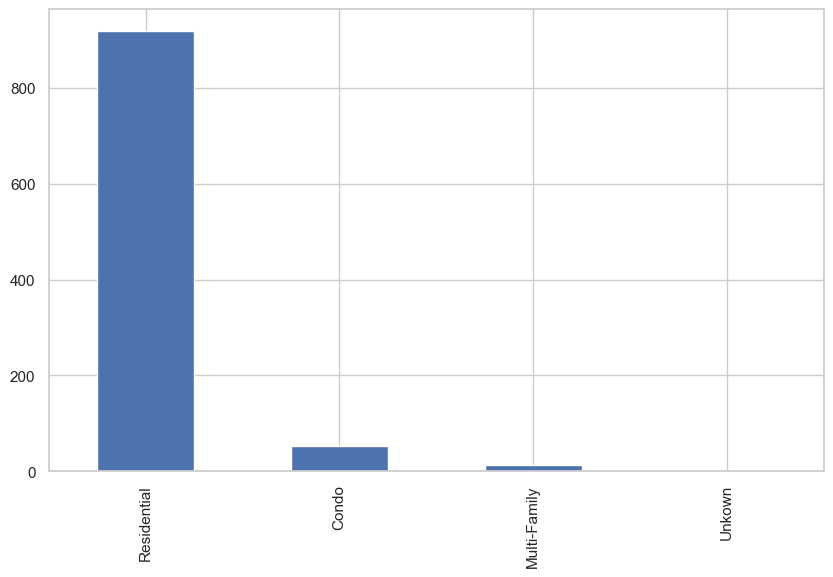

In [19]:
df.type.value_counts().plot(kind = 'bar');

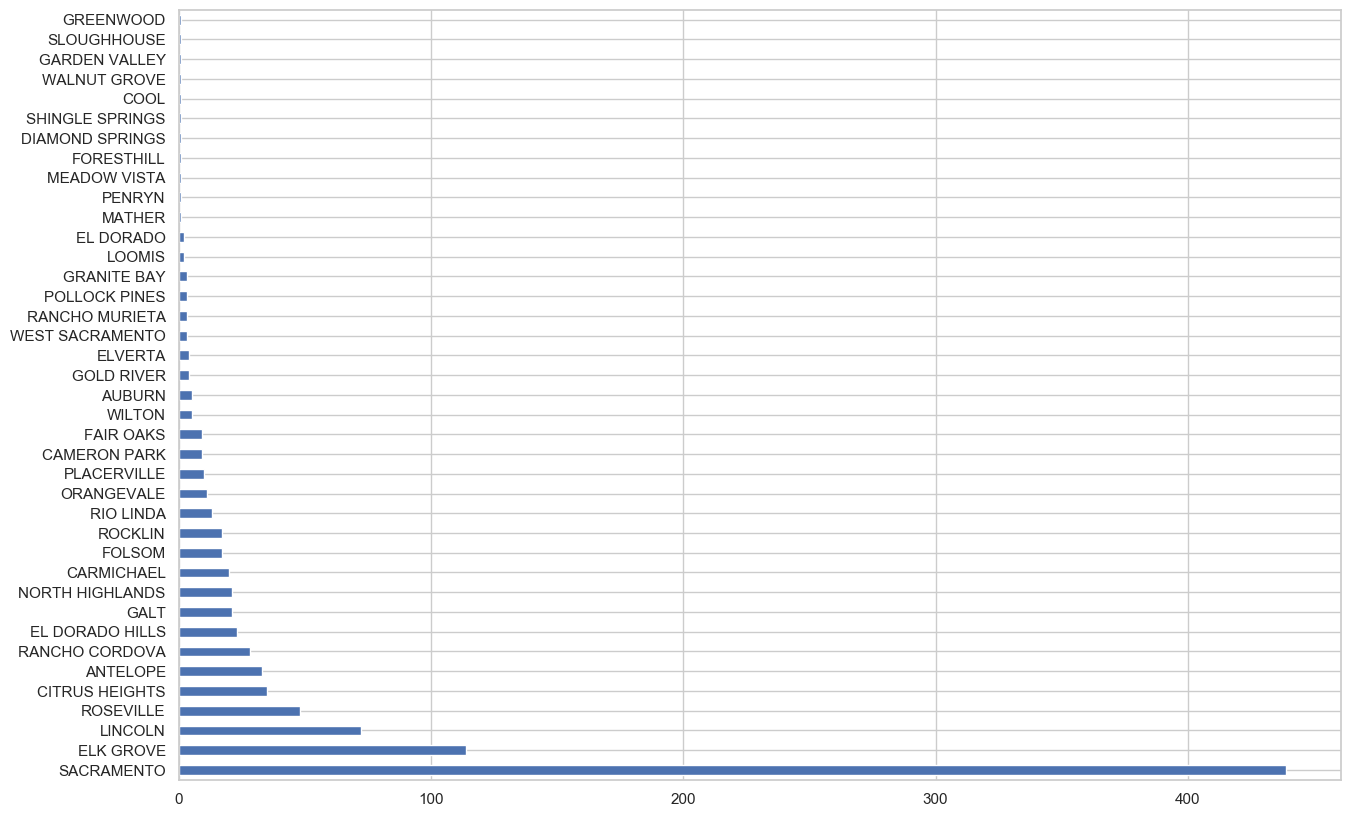

In [20]:
df.city.value_counts().plot( kind = 'barh',figsize=(15,10));

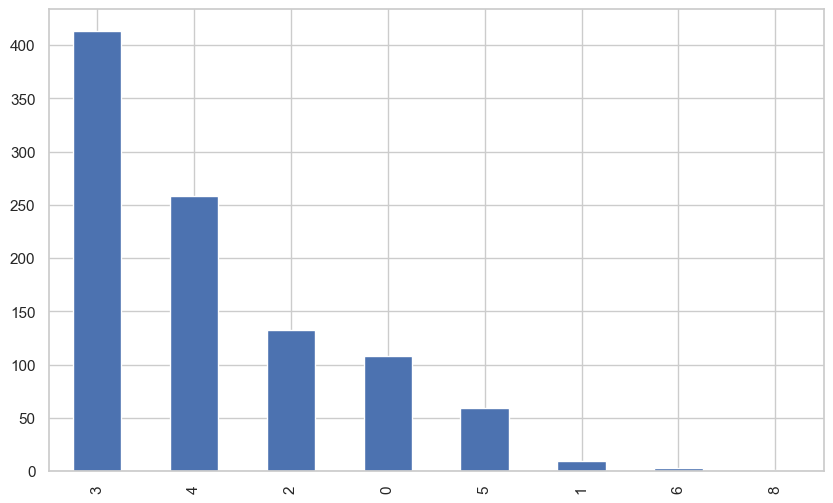

In [21]:
df.beds.value_counts().plot(kind = 'bar');

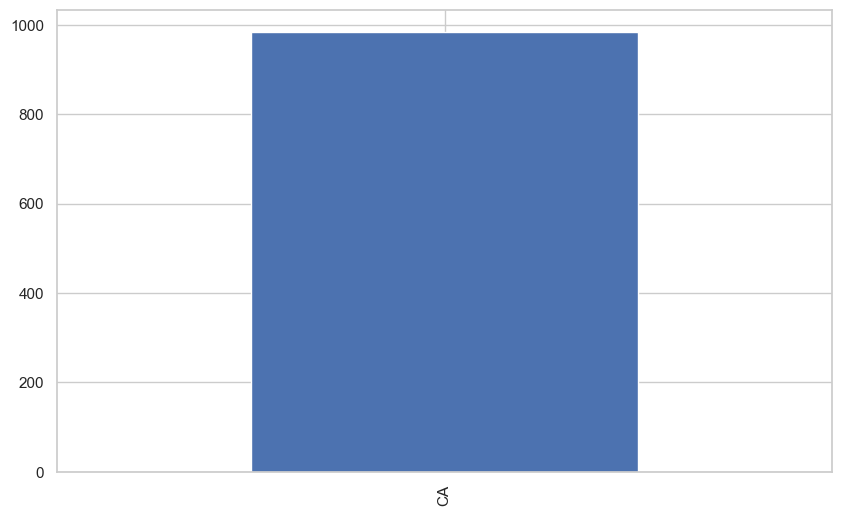

In [22]:
df.state.value_counts().plot(kind='bar');

In [23]:
import folium

In [24]:
m = folium.Map( location = [38.575764, -121.478851], zoom_start = 10)

In [25]:
for i in range (0, len(df.head(1000))):
    folium.Marker(location = [df.iloc[i]['latitude'], df.iloc[i]['longitude']]).add_to(m)
    
m

In [26]:
Y = df.price #(target)
X = df.beds #(predictor)

In [27]:
def draw_scatter_plot (X,Y):
    fig = plt.figure(figsize = (15,10))
    ax = plt.gca()
    ax.scatter(X,Y, c='b')
    plt.show();

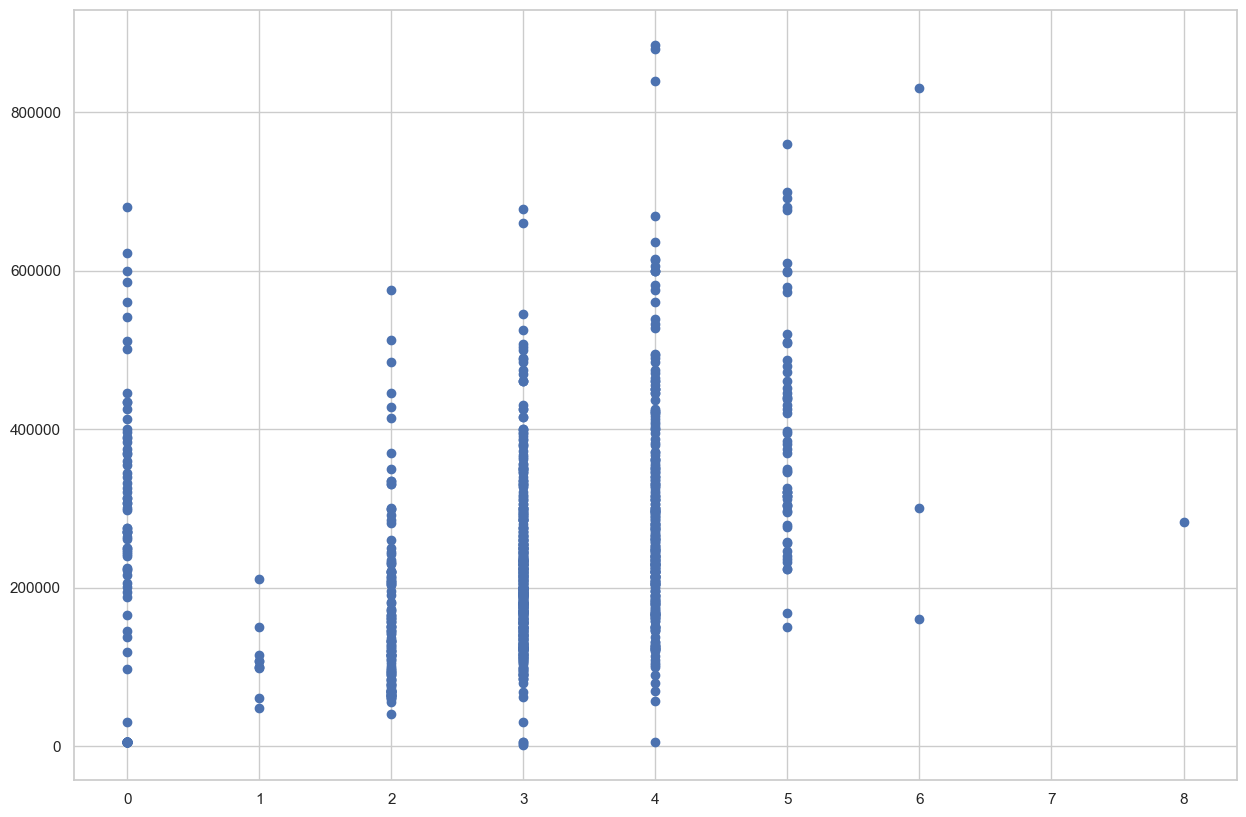

In [28]:
draw_scatter_plot(df.beds,df.price)

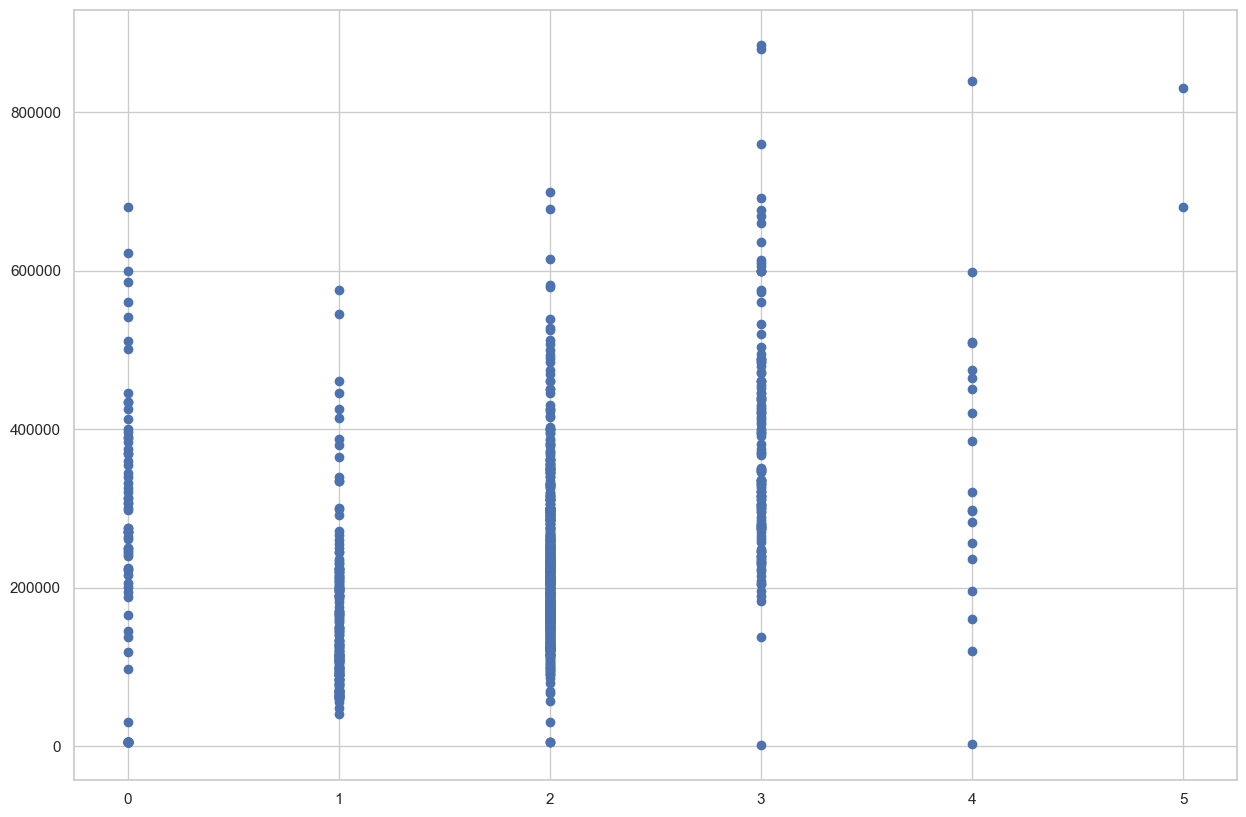

In [29]:
draw_scatter_plot(df.baths,df.price)

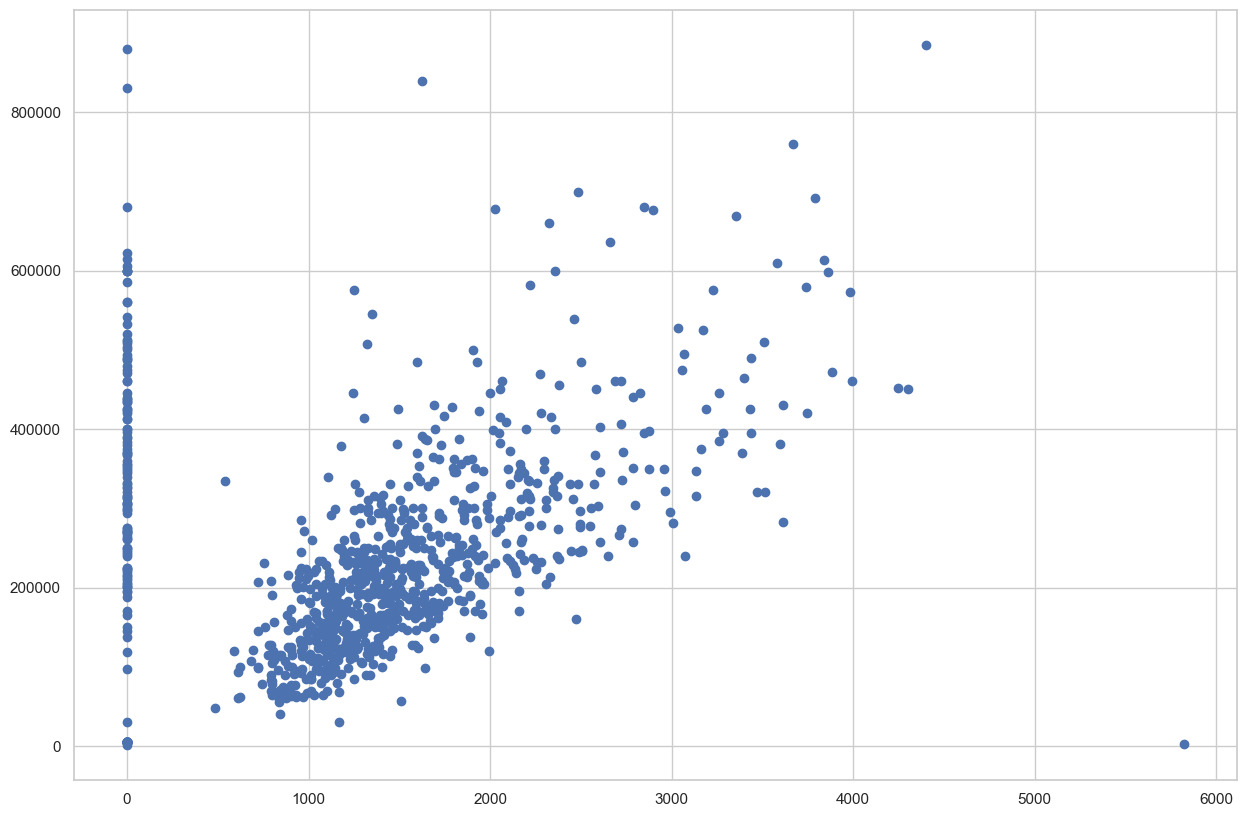

In [30]:
draw_scatter_plot(df.sq__ft,df.price)

In [31]:
df.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [32]:
df['y_hat'] = df.price.mean()

In [33]:
X = df['sq__ft']
Y = df['price']
Yhat = df['y_hat']

In [34]:
def draw_plot(X,Y,Yhat):
    fig = plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.scatter(X,Y, c='b')
    ax.plot(X,Yhat, color = 'r');
    
    plt.show();

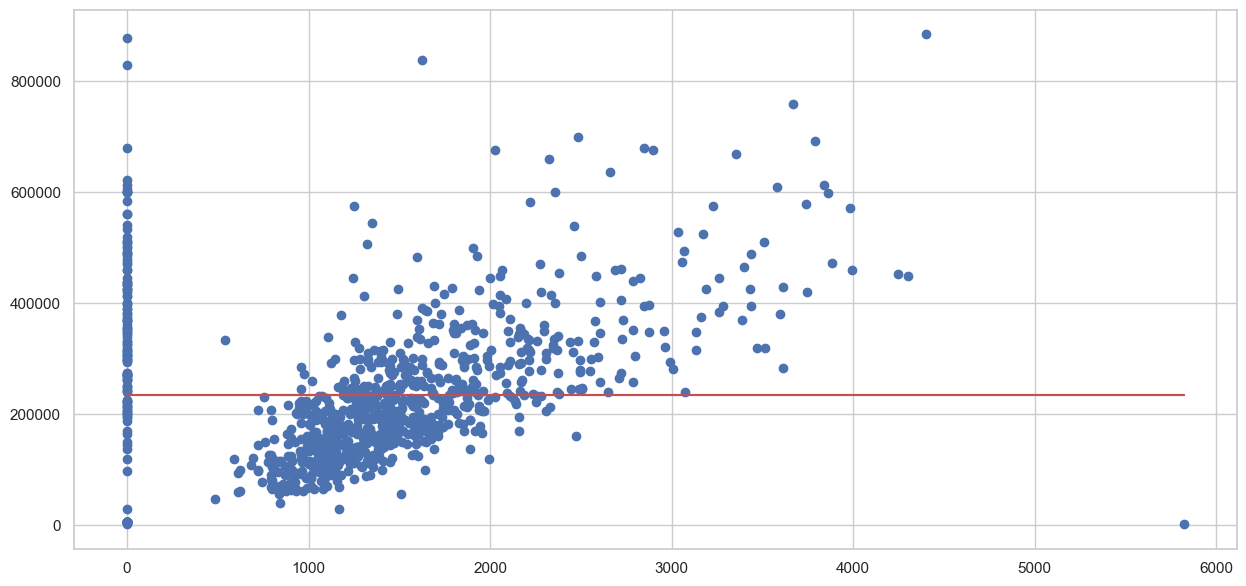

In [35]:
draw_plot(X,Y,Yhat)

In [36]:
res = abs(df.price - df.y_hat).mean()

In [37]:
X = df.sq__ft
Y = df.price

## **Calculate beta_1**

In [38]:
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    
    beta_1 = n/d
    
    return beta_1

In [39]:
beta_1 = calculate_beta_1(X,Y)
beta_1

54.158639688530755

## **Calculate beta_0**

In [40]:
def calculate_beta_0(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - calculate_beta_1(X,Y) * Xbar
    
    return beta_0

In [41]:
beta_0 = calculate_beta_0(X,Y)
beta_0

162930.16140699777

In [42]:
X

0       836
1      1167
2       796
3       852
4       797
       ... 
980    2280
981    1477
982    1216
983    1685
984    1362
Name: sq__ft, Length: 985, dtype: int64

## **Calculate Yhat**

In [43]:
def calculate_yhat(x,b0,b1):
    return b0+b1+x

In [44]:
Yhat = calculate_yhat(X,beta_0,beta_1)
Yhat

0      163820.320047
1      164151.320047
2      163780.320047
3      163836.320047
4      163781.320047
           ...      
980    165264.320047
981    164461.320047
982    164200.320047
983    164669.320047
984    164346.320047
Name: sq__ft, Length: 985, dtype: float64

## **Calculate Residual**

In [45]:
def calculate_residual(Y,Yhat):
    res = Y - Yhat
    return res

In [46]:
resi = calculate_residual(Y,Yhat)
abs(resi)

0      104598.320047
1       95939.320047
2       94900.320047
3       94529.320047
4       81881.320047
           ...      
980     67160.679953
981     69538.679953
982     70799.679953
983     70631.679953
984     71391.679953
Length: 985, dtype: float64

## **Calculate R-Square**

In [47]:
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y-Ybar)
    SStot = np.sum(SStot)
    return SStot

In [48]:
def calculate_residual_sum_of_square(Y,Yhat):
    SSres = np.square(Y-Yhat)
    SSres = np.sum(SSres)
    return SSres

In [49]:
def calculate_r_square(Y,Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y,Yhat)
    Rsquare= 1 - (SSres/SStot)
    return Rsquare

In [50]:
calculate_total_sum_of_square

<function __main__.calculate_total_sum_of_square(Y)>

In [51]:
calculate_r_square(Y,np.mean(Y))

0.0

In [52]:
calculate_r_square(Y,calculate_yhat(X,beta_0,beta_1))

-0.2509879946643838

## **Draw Plot of Predicted Line with Residuals**

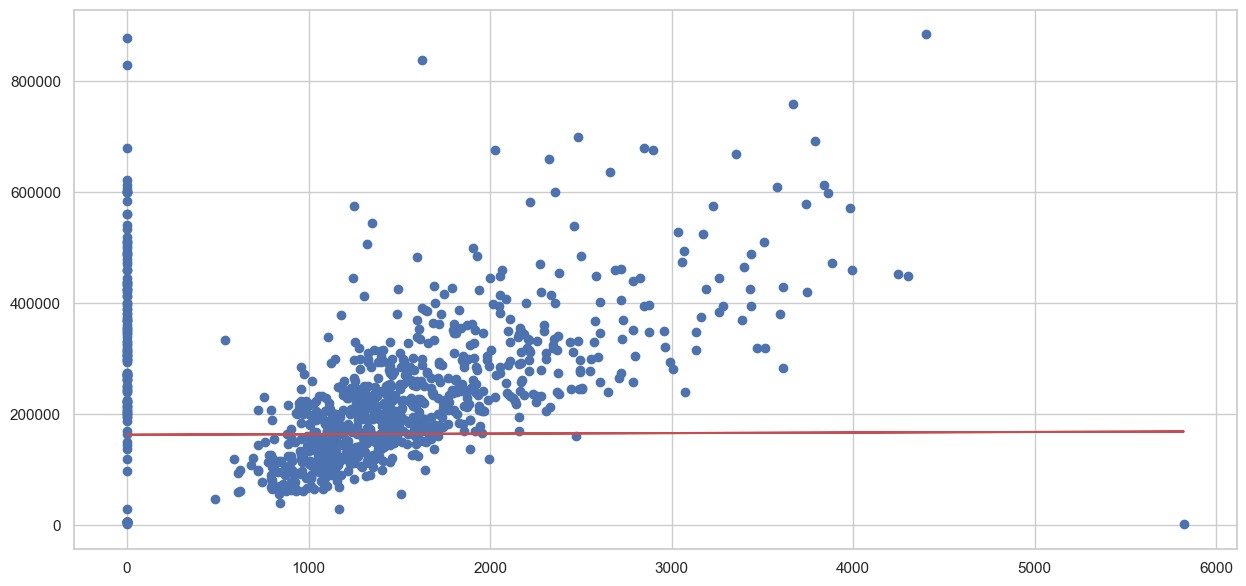

In [53]:
draw_plot(X,Y,Yhat)

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [54]:
xpred = 1204

In [55]:
beta_0

162930.16140699777

In [56]:
beta_1

54.158639688530755

In [57]:
Ypred = beta_1 * xpred + beta_0
Ypred

228137.1635919888

- street             2561 19TH AVE
- city                  SACRAMENTO
- zip                        95820
- state                         CA
- beds                           3
- baths                          1
- sq__ft                      1177

In [58]:
xpred = 1177

In [59]:
Ypred = beta_1 * xpred + beta_0
Ypred

226674.88032039846

In [60]:
X = df['sq__ft']

In [61]:
X

0       836
1      1167
2       796
3       852
4       797
       ... 
980    2280
981    1477
982    1216
983    1685
984    1362
Name: sq__ft, Length: 985, dtype: int64

In [62]:
X = df['sq__ft'].values.reshape(-1,1)

In [63]:
X

array([[ 836],
       [1167],
       [ 796],
       [ 852],
       [ 797],
       [1122],
       [1104],
       [1177],
       [ 941],
       [1146],
       [ 909],
       [1289],
       [ 871],
       [1020],
       [1022],
       [1134],
       [ 844],
       [ 795],
       [ 588],
       [1356],
       [1118],
       [1329],
       [1240],
       [1601],
       [ 901],
       [1088],
       [ 963],
       [1119],
       [1380],
       [1248],
       [1039],
       [1152],
       [1380],
       [1116],
       [1039],
       [1418],
       [1082],
       [1472],
       [1146],
       [ 760],
       [1304],
       [1207],
       [1056],
       [1043],
       [1587],
       [1120],
       [1580],
       [1955],
       [1656],
       [1477],
       [1188],
       [1590],
       [1463],
       [1714],
       [1185],
       [1406],
       [1943],
       [1172],
       [1152],
       [1851],
       [1215],
       [1130],
       [1603],
       [1479],
       [1420],
       [1280],
       [15

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
X = df['sq__ft'].values.reshape(-1,1)
Y = df['price']

In [66]:
linreg = LinearRegression()
linreg.fit(X, Y)

LinearRegression()

In [67]:
print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


coef = beta_1 and intercept = beta_0

In [68]:
linreg.score(X, Y)

0.11148717682951437

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [71]:
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape[0])
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows 788

Sample of X_train__________________________________________________
[[   0]
 [3173]
 [ 810]
 [ 844]
 [   0]
 [2992]
 [   0]
 [3838]
 [1739]
 [2096]]

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (788,)

Sample of y_train__________________________________________________
865      1551
849    525000
203    156000
16     113263
604     30000
487    295000
234    215500
330    613401
436    221000
767    289000
Name: price, dtype: int64


In [72]:
print('X_test is a %s' % type(X_test))
print('X_test has %d rows', X_test.shape)
print('')
print('Sample of X_test%s' % ('_'*50))
print(X_test[:10])

print('')
print('y_test is a %s' % type(y_test))
print('y_test has %d rows', y_test.shape)
print('')
print('Sample of y_test%s' % ('_'*50))
print(y_test[:10])

X_test is a <class 'numpy.ndarray'>
X_test has %d rows (197, 1)

Sample of X_test__________________________________________________
[[1995]
 [1302]
 [ 933]
 [1695]
 [1204]
 [1711]
 [   0]
 [1156]
 [1193]
 [2800]]

y_test is a <class 'pandas.core.series.Series'>
y_test has %d rows (197,)

Sample of y_test__________________________________________________
366    120000
442    230000
870     62000
667    179000
930    174250
650    161500
126    339500
206    161653
86     240122
117    304037
Name: price, dtype: int64


### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [73]:
linreg.intercept_, linreg.coef_

(162930.16140699777, array([54.15863969]))

In [74]:
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1204

Ypred = beta1 * x + beta0
print('Predicted house price: ', Ypred[0])

Predicted house price:  228137.16359198876


In [75]:
x = [[1204]]
Ypred = linreg.predict(x)
print('Predicted house price: ', Ypred[0])

Predicted house price:  228137.16359198876


In [76]:
y_preds = linreg.predict(X_test)

y_preds[:10]

array([270976.64758562, 233444.71028146, 213460.1722364 , 254729.05567906,
       228137.16359199, 255595.59391407, 162930.161407  , 225537.54888694,
       227541.41855541, 314574.35253488])

In [77]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds, squared=True)

18828882198.379898

- street          645 MORRISON AVE
- city                  SACRAMENTO
- zip                        95838
- state                         CA
- beds                           3
- baths                          2
- sq__ft                       909

In [78]:
x = [[909]]
Ypred = linreg.predict(x)
print('Predicted house price:', Ypred[0])

Predicted house price: 212160.36488387221


- street           7511 OAKVALE CT
- city             NORTH HIGHLANDS
- zip                        95660
- state                         CA
- beds                           4
- baths                          2
- sq__ft                      1240

In [79]:
x = [[1240]]
ypred = linreg.predict(x)
print('Predicted house price:', ypred[0])

Predicted house price: 230086.87462077587


In [80]:
wine = pd.read_csv('../../DATA/winequality_merged.csv')

In [81]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [82]:
wine.shape

(6497, 13)

In [83]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [84]:
corr = wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


In [85]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

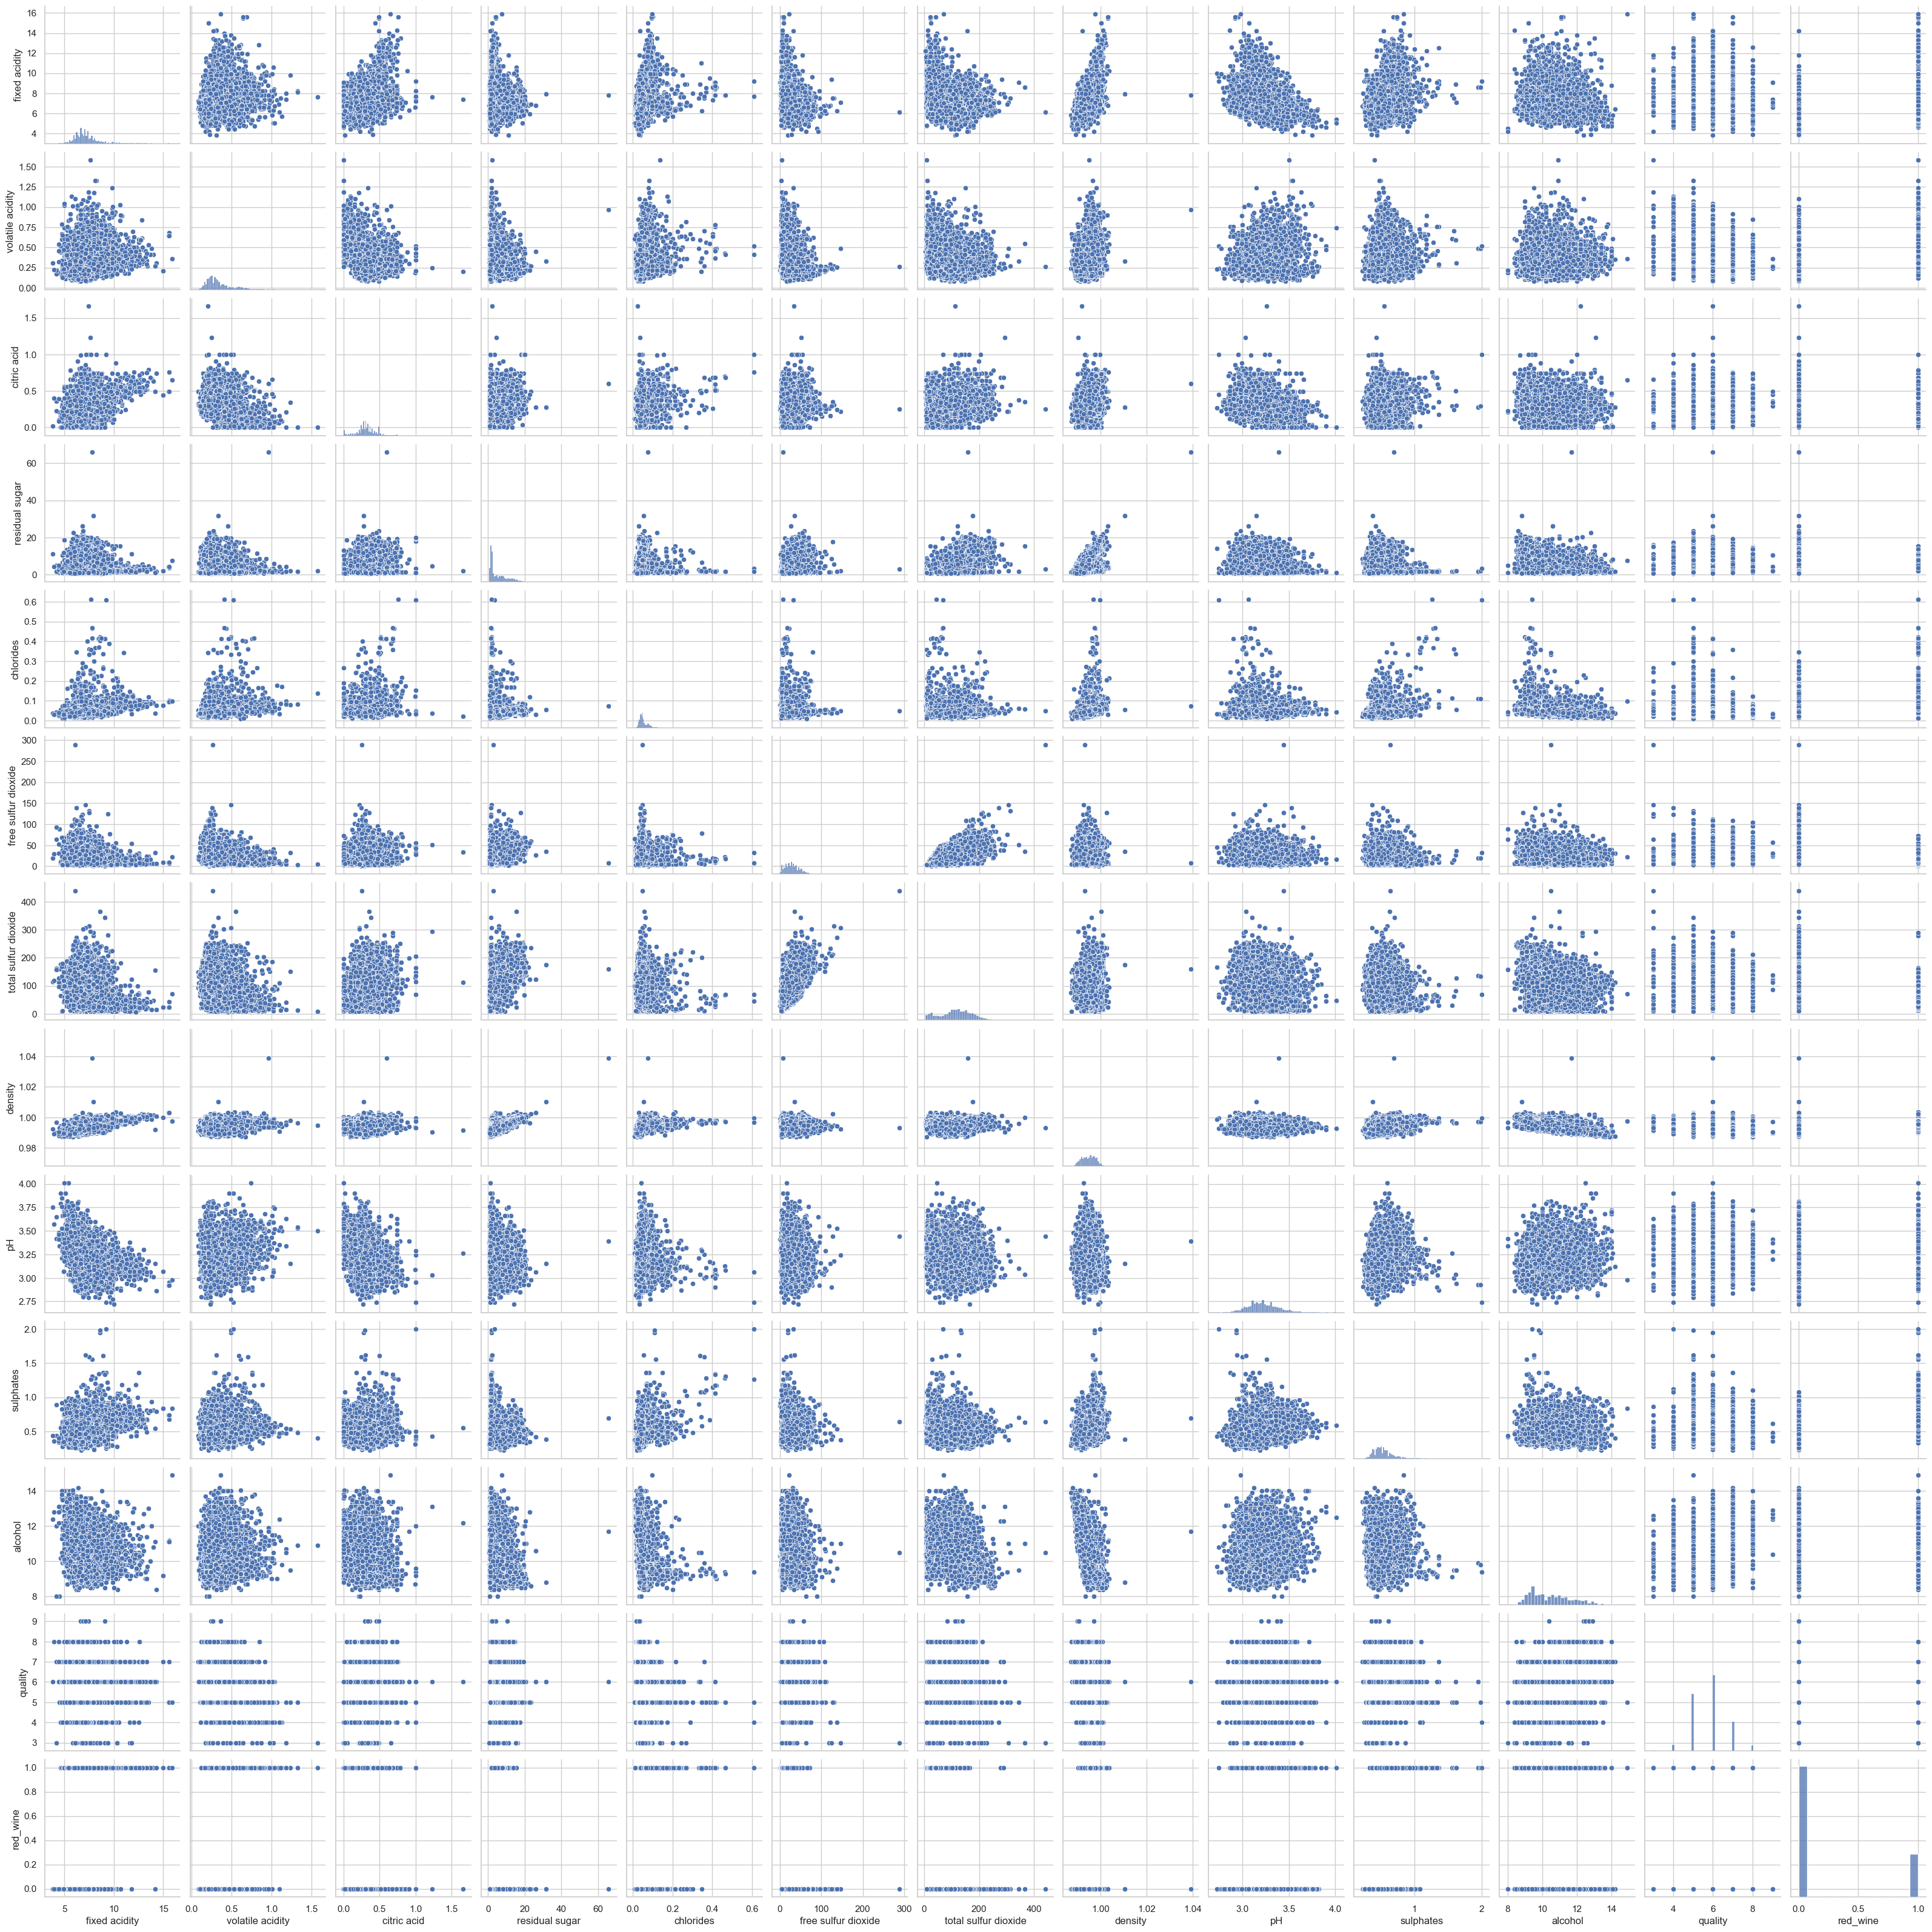

In [86]:
sns.pairplot(wine)

C:\Users\britn\anaconda3\envs\iod\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


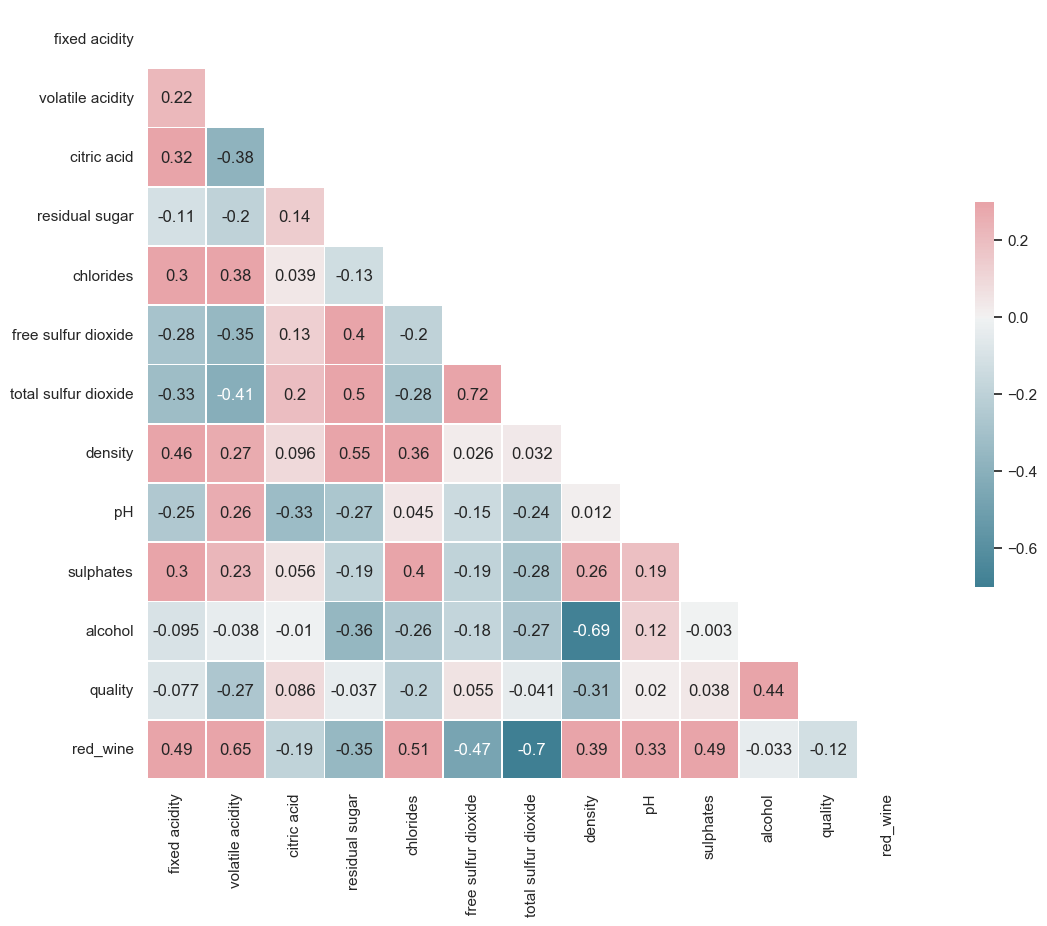

In [87]:
sns.set(style= "white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, mask=mask, cmap = cmap, vmax=.3, center=0, square=True,linewidths=.5, cbar_kws={"shrink": .5}, annot=True );

In [88]:
y = wine.quality

In [89]:
wine.corr().quality.sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
red_wine               -0.119323
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [90]:
predictor_columns = wine[['density', 'volatile acidity', 'chlorides', 'alcohol']]

In [91]:
X = predictor_columns 
X.head()

,density,volatile acidity,chlorides,alcohol
0,0.9978,0.70,0.076,9.4
1,0.9968,0.88,0.098,9.8
2,0.9970,0.76,0.092,9.8
3,0.9980,0.28,0.075,9.8
4,0.9978,0.70,0.076,9.4


In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 20, random_state = 42)

In [95]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [96]:
linreg.score(X_train,y_train)

0.26649278302017954

In [97]:
linreg.score(X_test,y_test)

0.5092674895306719

In [98]:
# Find coefficients

linreg_coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': linreg.coef_})
linreg_coef_df

,feature,coefficient
0,density,38.232269
1,volatile acidity,-1.474885
2,chlorides,-0.220692
3,alcohol,0.381397


In [99]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [100]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

In [101]:
for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    linreg.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = linreg.predict(X_train)
    test_preds = linreg.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(linreg.score(X_train, y_train))
    test_scores.append(linreg.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.263857,0.280476,0.750379,0.735733
2,0.276458,0.231846,0.738335,0.782935
3,0.264573,0.278037,0.749239,0.740169
4,0.269197,0.258288,0.753140,0.724287
5,0.263371,0.282246,0.745470,0.755194


In [102]:
metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.267491,0.266178,0.747313,0.747663
std,0.005523,0.021472,0.005724,0.022615
min,0.263371,0.231846,0.738335,0.724287
25%,0.263857,0.258288,0.745470,0.735733
50%,0.264573,0.278037,0.749239,0.740169
75%,0.269197,0.280476,0.750379,0.755194
max,0.276458,0.282246,0.753140,0.782935


In [103]:
# Load the wine dataset from csv
wine = pd.read_csv('../../DATA/winequality_merged.csv')

# define the target variable (dependent variable) as y
y = wine['quality']

# Take all columns except target as predictor columns
predictor_columns = [c for c in wine.columns if c != 'quality']
# Load the dataset as a pandas data frame
X = pd.DataFrame(wine, columns = predictor_columns)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [105]:
show_steps = True

In [106]:
X_train.shape[0]

5197

In [107]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = chlorides, sulphates, total sulfur dioxide, density, alcohol, pH, fixed acidity, red_wine, citric acid, volatile acidity, residual sugar, free sulfur dioxide
(Step) Trying chlorides...
(Step) - Features = chlorides
(Step) - Adjusted R^2: This = 0.037; Best = 0.000
(Step) - New Best!   : Feature = chlorides; R^2 = 0.037; Adjusted R^2 = 0.037
(Step) Trying sulphates...
(Step) - Features = sulphates
(Step) - Adjusted R^2: This = 0.002; Best = 0.037
(Step) Trying total sulfur dioxide...
(Step) - Features = total sulfur dioxide
(Step) - Adjusted R^2: This = 0.002; Best = 0.037
(Step) Trying density...
(Step) - Features = density
(Step) - Adjusted R^2: This = 0.094; Best = 0.037
(Step) - New Best!   : Feature = density; R^2 = 0.095; Adjusted R^2 = 0.094
(Step) Trying alcohol...
(Step) - Features = alcohol
(Step) - Adjusted R^2: This = 0.200; Best = 0.094
(Step) - New Best!   : Feature = alcohol; R^2 = 0.201; Adjusted R^2 = 0.200
(Step) Trying pH...
(Step) - Features = pH
(

#### 1.1 Load Diabetics Data Using datasets of sklearn

In [108]:
diabetes = datasets.load_diabetes()

In [109]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [110]:
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [111]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [112]:
y = diabetes.target

In [113]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [115]:
X_train.shape

(353, 10)

### 1.2 Use Forward Feature Selection to pick a good model
- Add R^2 value in a list
- Add Adjusted R^2 in another list
- Display both R^2 and Adjusted R^2

In [116]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [117]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = s3, sex, bmi, s4, s6, age, s2, bp, s1, s5
(Step) Trying s3...
(Step) - Features = s3
(Step) - Adjusted R^2: This = 0.145; Best = 0.000
(Step) - New Best!   : Feature = s3; R^2 = 0.147; Adjusted R^2 = 0.145
(Step) Trying sex...
(Step) - Features = sex
(Step) - Adjusted R^2: This = -0.003; Best = 0.145
(Step) Trying bmi...
(Step) - Features = bmi
(Step) - Adjusted R^2: This = 0.364; Best = 0.145
(Step) - New Best!   : Feature = bmi; R^2 = 0.366; Adjusted R^2 = 0.364
(Step) Trying s4...
(Step) - Features = s4
(Step) - Adjusted R^2: This = 0.178; Best = 0.364
(Step) Trying s6...
(Step) - Features = s6
(Step) - Adjusted R^2: This = 0.150; Best = 0.364
(Step) Trying age...
(Step) - Features = age
(Step) - Adjusted R^2: This = 0.036; Best = 0.364
(Step) Trying s2...
(Step) - Features = s2
(Step) - Adjusted R^2: This = 0.021; Best = 0.364
(Step) Trying bp...
(Step) - Features = bp
(Step) - Adjusted R^2: This = 0.196; Best = 0.364
(Step) Trying s1...
(Step) - Features = s1
(S

In [118]:
excluded = list(set(X.columns) - set(included))
excluded

['s3', 'age', 's6']

In [119]:
set(included)

{'bmi', 'bp', 's1', 's2', 's4', 's5', 'sex'}

In [120]:
set(X.columns)

{'age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'sex'}